## Heart Failure Prediction 
we will be looking into the heart disease dataset from that dataset we will derive various insights that help us know the weightage of each feature and how they are interrelated to each other but this time our sole aim is to detect the probability of person that will be affected by a savior heart problem or not.

### Importing Necessary Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report



### Importing Data

In [61]:
df = pd.read_csv("heart.csv")

### Exploratory Data Analysis
Now, let’s see the size of the dataset



In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Out of 14 features, we have 13 int types and only one with the float data. This dataset doesn’t hold any missing values.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


- Count Shows total number of samples in the data set.
- Mean shows avg of that particular features.
- std shows the standard deviation of the features.
- min shows the minimum value of that features.
- 25% shows first quartile.
- 50% shows second quartile.
- 75% shows third quartile.
- max shows maximum value of data.

#### Correlation
It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

/var/folders/r2/9ds2618j6856jftkn59ymwrm0000gn/T/ipykernel_38768/3980935626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

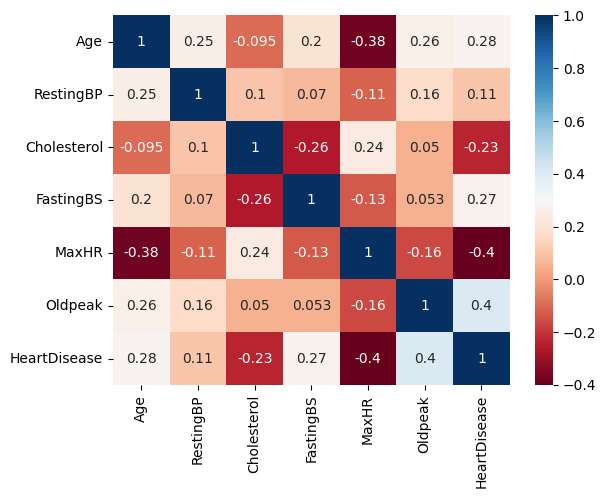

In [11]:
correlation = df.corr()
sns.heatmap(correlation, annot= True, cmap = 'RdBu')

By far we have checked the correlation between the features lets check the correlation of the target variable.



In [63]:
px.histogram(data_frame = df, x = 'Age', color = 'HeartDisease', title="Distribution of Heart Diseases over Age",barmode="group")


Here we can see that elder people are the most affected by heart disease and young ones are the least affected.

In [17]:
px.histogram(data_frame = df, x = 'Sex', color = 'HeartDisease', title="Distribution of Heart Diseases over Sex",barmode="group")


Here it is clearly visible that, Ratio of Male to Female is approx 2:1.

In [18]:
px.histogram(data_frame = df, x = 'ChestPainType', color = 'HeartDisease', title="Distribution of Heart Diseases over ChestPainType",barmode="group")

As seen, there are 4 types of chest pain

- status at least
- condition slightly distressed
- condition medium problem
- condition too bad

- People having the least chest pain are not likely to have heart disease.
- People having severe chest pain are likely to have heart diseas

In [64]:
px.histogram(data_frame = df, x = 'RestingECG', color = 'HeartDisease', title="Distribution of Heart Diseases over RestingECG",barmode="group")

In [65]:
px.histogram(data_frame = df, x = 'Cholesterol', color = 'HeartDisease', title="Distribution of Heart Diseases over Cholesterol",barmode="group")


In [ ]:
px.histogram(data_frame = df, x = 'Sex', color = 'HeartDisease', title="Distribution of Heart Diseases over Sex",barmode="group")


[]

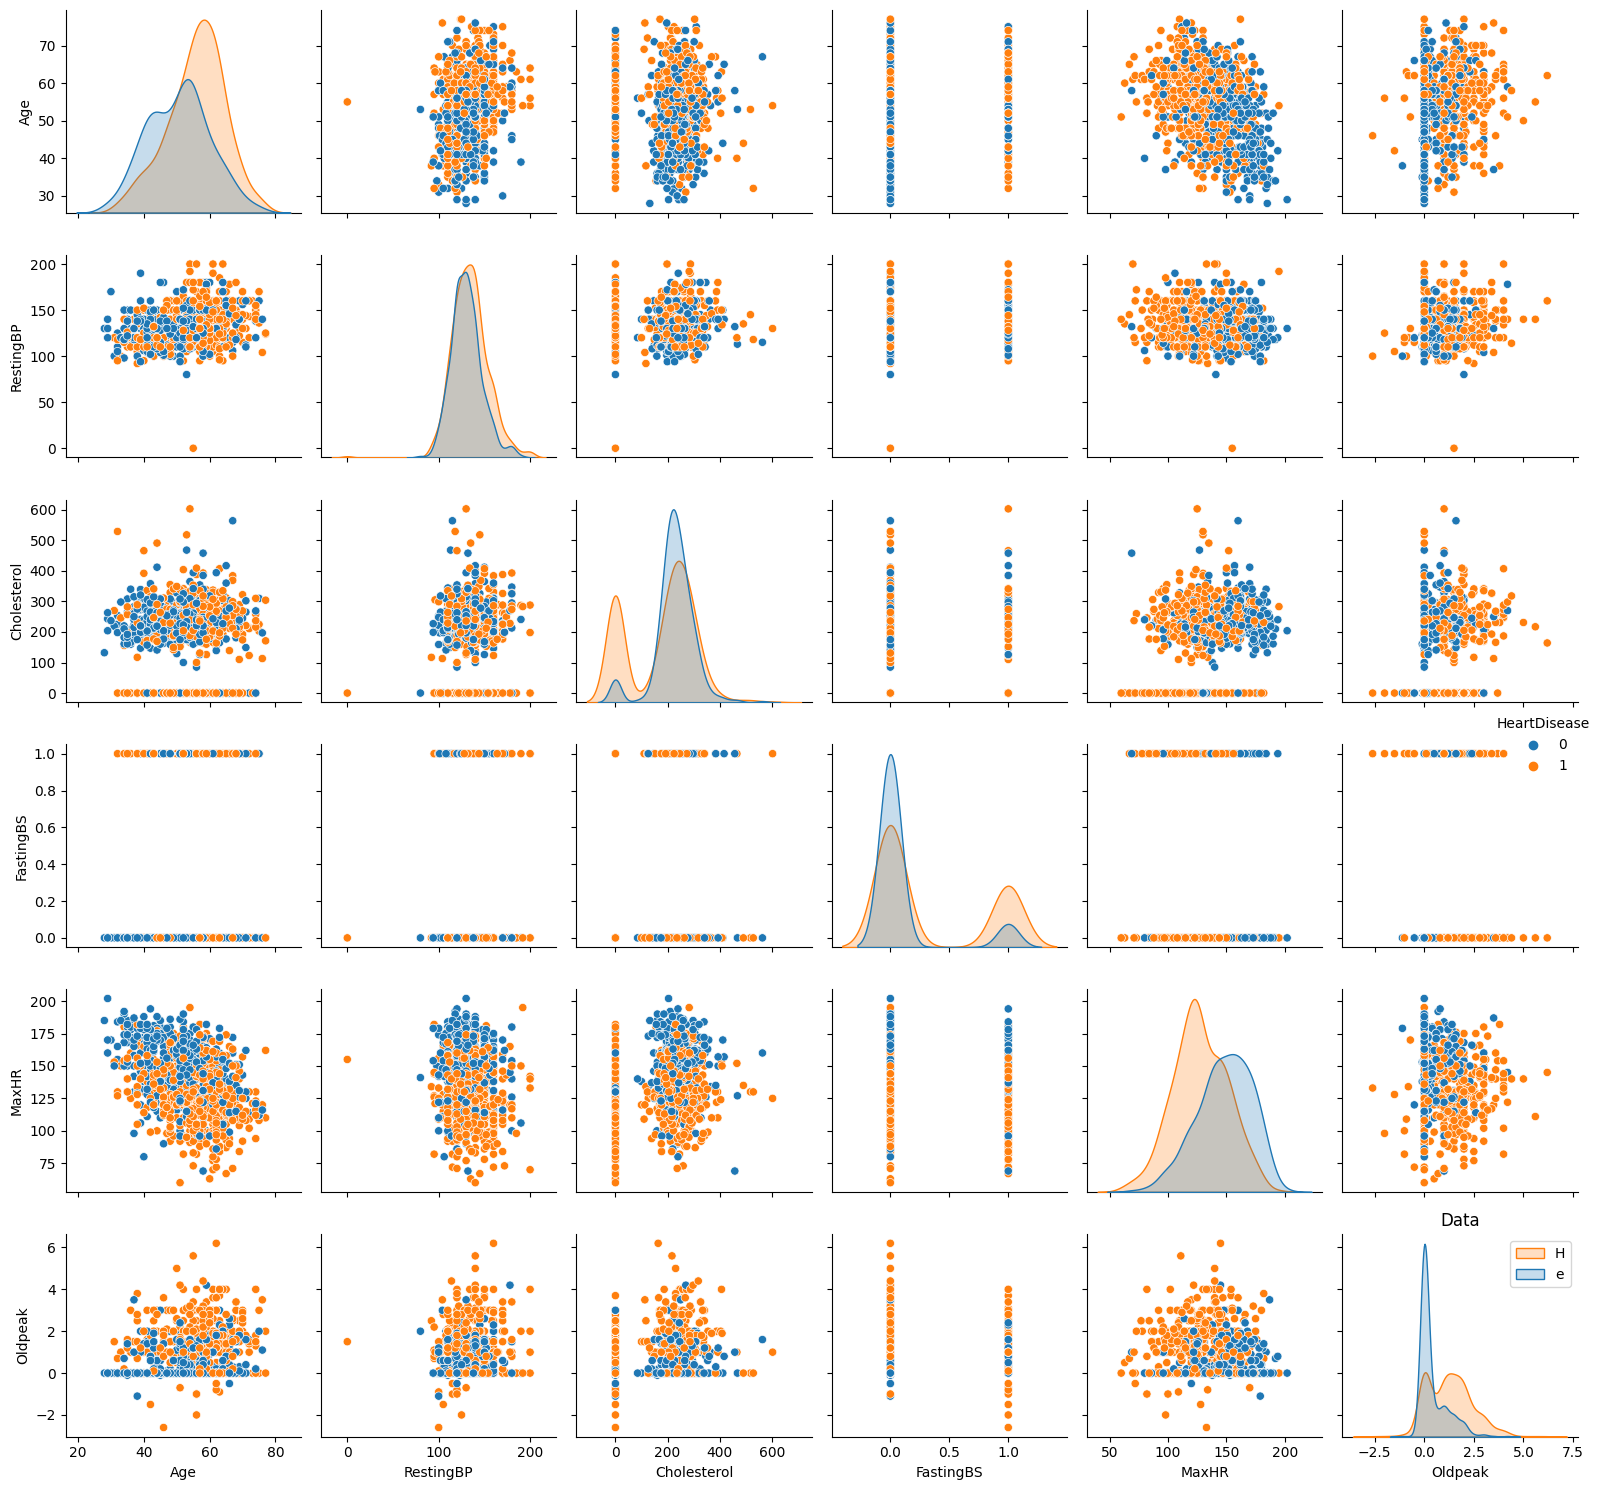

In [21]:
sns.pairplot(df,hue="HeartDisease")
plt.title("Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [91]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak','ST_Slope']
target = 'HeartDisease'

In [92]:
X = df[features]
y = df[target]

In [93]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,1,98,0,10,2
1,21,0,2,55,40,1,82,0,20,1
2,9,1,1,31,141,2,25,0,10,2
3,20,0,0,39,72,1,34,1,25,1
4,26,1,2,49,53,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,1,58,0,22,1
914,40,1,0,45,51,1,67,0,42,1
915,29,1,0,31,9,1,41,1,22,1
916,29,0,1,31,94,0,100,0,10,1


In [94]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify = y)

## Logistic Regression

In [95]:
# Logistic Regression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8565217391304348


In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       103
           1       0.85      0.90      0.87       127

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



## Decision Tree

In [97]:
decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class

# Fit model to training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
# Plot the Confusion Matrix for the testing dataset  
y_predict_test = decision_tree.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_test)

0.8130434782608695

In [100]:
cm = confusion_matrix(y_test, y_predict_test)

# Classification Report
print(classification_report(y_test,y_predict_test))


              precision    recall  f1-score   support

           0       0.77      0.83      0.80       103
           1       0.85      0.80      0.83       127

    accuracy                           0.81       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.82      0.81      0.81       230



## Random Forest

In [101]:
# Import model
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [102]:
# Make predictions
rfc_pred = rfc.predict(X_test)
score_randomforest = rfc.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8956521739130435


In [103]:
# Confusion matrix
print(confusion_matrix(y_test,rfc_pred))

# New line
print('\n')

# Classfication report
print(classification_report(y_test,rfc_pred))

[[ 89  14]
 [ 10 117]]


              precision    recall  f1-score   support

           0       0.90      0.86      0.88       103
           1       0.89      0.92      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



## Support Vector Machine

In [104]:
#Train the Model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [105]:
#Making predictions

y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [106]:
score_svm = svclassifier.score(X_test,y_test)
print('The accuracy of the SVM Model is', score_svm)
print(confusion_matrix(y_test,y_pred))

The accuracy of the SVM Model is 0.8521739130434782
[[ 85  18]
 [ 16 111]]


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       103
           1       0.86      0.87      0.87       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



Conclusion on Heart Disease Prediction
1. We did data visualization and data analysis of the target variable, age features, and whatnot along with its univariate analysis and bivariate analysis.

2. We also did a complete feature engineering part in this article which summons all the valid steps needed for further steps i.e. model building.

3. From the above model accuracy, Random Forest is giving us the accuracy which is 89%.